<img width=200 src="https://docs.esmvaltool.org/en/v2.5.0/_static/ESMValTool-logo-2.png"> <img width=200 src="https://jupyter.org/assets/homepage/hublogo.svg"> <img width=200 src="https://zenodo.org/api/files/00000000-0000-0000-0000-000000000000/is-enes3/logo.png"> <img width=200 src="https://www.smhi.se/polopoly_fs/1.135796.1527766089!/image/LoggaEUCP.png_gen/derivatives/Original_366px/image/LoggaEUCP.png"> <img width=200 src="https://www.dkrz.de/@@site-logo/dkrz.svg"> <img width=200 src="https://upload.wikimedia.org/wikipedia/commons/8/85/SMHI_Logo.svg"> <img width=200 src="https://www.dtls.nl/wp-content/uploads/2015/03/NleSc.png">\

# Introduction to ESMValTool

[ESMValTool](https://github.com/ESMValGroup/ESMValTool) is a library of climate data analysis workflows ("recipes") and [ESMValCore](https://github.com/ESMValGroup/ESMValCore) is the tool that can run those recipes. With ESMValTool, it is easy to reproduce already published analyses as well as develop new ones. A useful feature is that you can directly access all the output (data, images, etc) and further process them in the notebook. ESMValTool has specifically been designed to analyse data produced as part of the [Climate Model Intercomparison Project](https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6), though it also [supports many observational and reanalysis datasets](https://docs.esmvaltool.org/en/latest/input.html#supported-datasets-for-which-a-cmorizer-script-is-available). It is used extensively to (re)produce the analyses in the [IPCC Assessment Reports](https://www.ipcc.ch/assessment-report/ar6/).

In [1]:
# Import the tool
import esmvalcore.experimental as esmvaltool

# Import tools for plotting
import matplotlib.pyplot as plt
import iris.quickplot

/home/k/k206100/.conda/envs/esmvaltool/lib/python3.10/site-packages/esmvalcore/experimental/_warnings.py:13: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498
ERROR 1: PROJ: proj_create_from_database: Open of /home/k/k206100/.conda/envs/esmvaltool/share/proj failed


## Working with ESMValTool recipes

To see a list of [all the available ESMValTool recipes](https://docs.esmvaltool.org/en/latest/recipes/index.html) (only the first 10 are shown here):

In [2]:
all_recipes = esmvaltool.get_all_recipes()
all_recipes[:10]

[Recipe('Recipe eady growth rate'),
 Recipe('Recipe autoassess radiation rms cfmon all'),
 Recipe('Recipe ecs scatter'),
 Recipe('Recipe ocean bgc'),
 Recipe('Recipe miles block'),
 Recipe('Recipe tcr'),
 Recipe('Recipe impact'),
 Recipe('Recipe extreme index'),
 Recipe('Recipe seaice feedback'),
 Recipe('Recipe wenzel16nat')]

In this notebook, we'll just run the following recipe. Documentation for this recipe is available [here](https://docs.esmvaltool.org/en/latest/recipes/recipe_examples.html).

In [3]:
example_recipe = esmvaltool.get_recipe("examples/recipe_python.yml")
example_recipe

Recipe('Recipe python')

The recipe contains a [specification](https://docs.esmvaltool.org/projects/esmvalcore/en/latest/recipe/overview.html) that describes the analysis to run. It is written in YAML format. The most important elements are:
- which variables to use
- from which datasets
- how to preprocess (e.g. regrid, compute statistics, etc) those
- and finally, which analysis scripts to run

This recipe looks like this:

In [4]:
print(example_recipe.path.read_text())

# ESMValTool
# recipe_python.yml
---
documentation:
  description: |
    Example recipe that plots a map and timeseries of temperature.

  title: Recipe that runs an example diagnostic written in Python.

  authors:
    - andela_bouwe
    - righi_mattia

  maintainer:
    - schlund_manuel

  references:
    - acknow_project

  projects:
    - esmval
    - c3s-magic

datasets:
  - {dataset: BCC-ESM1, project: CMIP6, exp: historical, ensemble: r1i1p1f1, grid: gn}
  - {dataset: CanESM2, project: CMIP5, exp: historical, ensemble: r1i1p1}

preprocessors:

  select_january:
    extract_month:
      month: 1

  annual_mean_amsterdam:
    extract_point:
      latitude: 52.379189
      longitude: 4.899431
      scheme: linear
    annual_statistics:
      operator: mean
    multi_model_statistics:
      statistics:
        - mean
      span: overlap

  annual_mean_global:
    area_statistics:
      operator: mean
      fx_variables:
        areacella:
    annual_statistics:
      operator: mean


## Configuring the tool

The [user configuration file](https://docs.esmvaltool.org/projects/esmvalcore/en/latest/quickstart/configure.html) is where you configure the tool. For example, the `rootpath` setting tells the tool where your data lives, if you have any.  Typically this file is stored in `~/.esmvaltool/config-user.yml`. 

In [5]:
esmvaltool.CFG

Config({'auxiliary_data_dir': PosixPath('/work/bd0854/DATA/ESMValTool2/AUX'),
        'compress_netcdf': False,
        'config_developer_file': None,
        'config_file': PosixPath('/home/k/k206100/.esmvaltool/config-user.yml'),
        'download_dir': PosixPath('/home/k/k206100/climate_data'),
        'drs': {'CMIP3': 'DKRZ',
                'CMIP5': 'DKRZ',
                'CMIP6': 'DKRZ',
                'CORDEX': 'BADC',
                'OBS': 'default',
                'OBS6': 'default',
                'ana4mips': 'default',
                'native6': 'default',
                'obs4MIPs': 'default'},
        'exit_on_warning': False,
        'extra_facets_dir': (),
        'log_level': 'info',
        'max_parallel_tasks': None,
        'offline': False,
        'output_dir': PosixPath('/home/k/k206100/esmvaltool_output'),
        'output_file_type': 'png',
        'profile_diagnostic': False,
        'remove_preproc_dir': True,
        'resume_from': [],
        'rootpath': 

Since version 2.4, the tool can automatically download the climate data files required to run a recipe for you. This can be enabled by setting:

In [6]:
esmvaltool.CFG['offline'] = False

To make sure that the automatic download works, we create the directory beforehand (e.g. needed when running on [Binder](https://mybinder.org/)):

In [7]:
esmvaltool.CFG['download_dir'].mkdir(exist_ok=True)

A major advantage of working on a machine like [Levante](https://docs.dkrz.de/doc/levante/index.html), is that a lot of [CMIP data is already available](https://docs.dkrz.de/doc/dataservices/finding_and_accessing_data/index.html#cmip-data-pool), so typically only a few files will need to be downloaded to run a recipe.

## Running a recipe

Let's run our first recipe and inspect the output

In [8]:
output = example_recipe.run()

ESGF credentials missing, only data that is accessible without
logging in will be available.

See https://esgf.github.io/esgf-user-support/user_guide.html
for instructions on how to create an account if you do not have
one yet.

Next, configure your system so esmvaltool can use your
credentials. This can be done using the keyring package, or
you can just enter them in /home/k/k206100/.esmvaltool/esgf-pyclient.yml.

keyring
First install the keyring package (requires a supported
backend, see https://pypi.org/project/keyring/):
$ pip install keyring

Next, set your username and password by running the commands:
$ keyring set ESGF hostname
$ keyring set ESGF username
$ keyring set ESGF password

To check that you entered your credentials correctly, run:
$ keyring get ESGF hostname
$ keyring get ESGF username
$ keyring get ESGF password

configuration file
You can store the hostname, username, and password or your OpenID
account in a plain text in the file /home/k/k206100/.esmvaltool/esgf-

## Plots and further analysis

The output of the recipe consists of images and data:

In [9]:
output

timeseries/script1:
  DataFile('tas_amsterdam_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_gn_1850-2000.nc')
  ImageFile('tas_global_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_gn_1850-2000.png')
  ImageFile('tas_amsterdam_MultiModelMean_historical_Amon_tas_1850-2000.png')
  DataFile('tas_global_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_gn_1850-2000.nc')
  ImageFile('tas_amsterdam_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.png')
  DataFile('tas_amsterdam_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.nc')
  DataFile('tas_global_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.nc')
  ImageFile('tas_amsterdam_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_gn_1850-2000.png')
  DataFile('tas_amsterdam_MultiModelMean_historical_Amon_tas_1850-2000.nc')
  ImageFile('tas_global_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.png')

map/script1:
  DataFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc')
  ImageFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_gn_2000-200

The output is also available as files:

In [10]:
for result in output['map/script1']:
    print(result.path)

/home/k/k206100/esmvaltool_output/recipe_python_20220520_122757/work/map/script1/CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc
/home/k/k206100/esmvaltool_output/recipe_python_20220520_122757/plots/map/script1/png/CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_gn_2000-2000.png
/home/k/k206100/esmvaltool_output/recipe_python_20220520_122757/plots/map/script1/png/CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png
/home/k/k206100/esmvaltool_output/recipe_python_20220520_122757/work/map/script1/CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_gn_2000-2000.nc


Let's have a look at one of the plots:

ImageFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_gn_2000-2000.png')
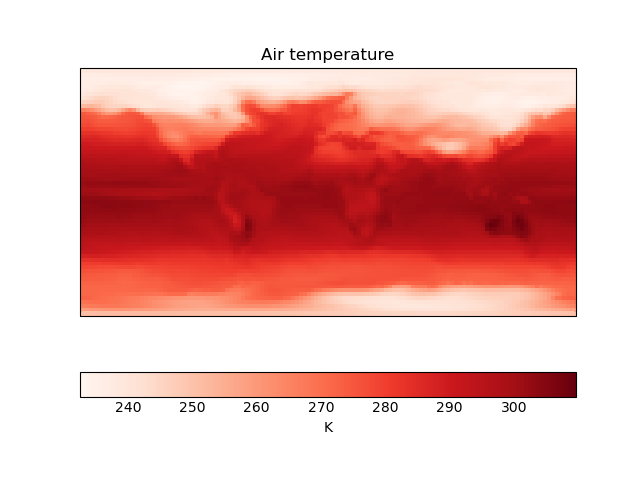

In [11]:
plots = [f for f in output['map/script1'] if isinstance(f, esmvaltool.recipe_output.ImageFile)]
plots[0]

The data used to create the plots is also available:

In [12]:
data_files = [f for f in output['map/script1'] if isinstance(f, esmvaltool.recipe_output.DataFile)]
data_files

[DataFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc'),
 DataFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_gn_2000-2000.nc')]

If the output is a dataset, you can load it with `xarray` or `iris`. In this way, you can immediately continue to work with the (pre-)processed data in your notebook.

In [13]:
xrds = data_files[0].load_xarray()
xrds

<xarray.Dataset>
Dimensions:       (lat: 64, lon: 128, bnds: 2)
Coordinates:
  * lat           (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon           (lon) float64 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
    height        float64 2.0
    month_number  int64 1
    time          object 2000-01-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    tas           (lat, lon) float32 242.2 242.0 241.8 ... 243.8 244.0 244.1
    lat_bnds      (lat, bnds) float64 -90.0 -86.48 -86.48 ... 86.48 86.48 90.0
    lon_bnds      (lon, bnds) float64 -1.406 1.406 1.406 ... 355.8 355.8 358.6
    time_bnds     (bnds) object 2000-01-01 00:00:00 2000-02-01 00:00:00
Attributes: (12/32)
    CCCma_data_licence:     1) GRANT OF LICENCE - The Government of Canada (E...
    CCCma_parent_runid:     IGA
    CCCma_runid:            IGM
    associated_files:       baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLoc...
    branch_time:            171915.0
    branch_time_YMDH:       2321:01:01:00
    ...                     ...
    software:               Created with ESMValTool v2.5.0
    source:                 CanESM2 2010 atmosphere: CanAM4 (AGCM15i, T63L35)...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  CanESM2 model output prepared for CMIP5 historical
    Conventions:            CF-1.7
    caption:                Average Near-Surface Air Temperature between 2000...

In [14]:
cube = data_files[0].load_iris()[0]
cube

<iris 'Cube' of air_temperature / (K) (latitude: 64; longitude: 128)>

This allows us to create our own plot:

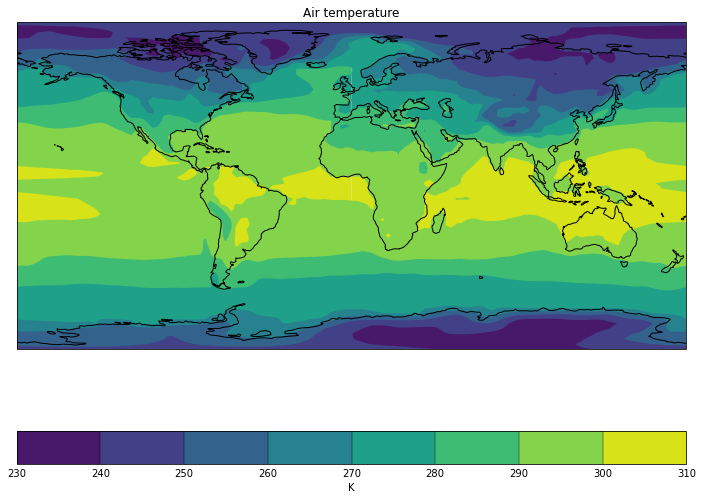

In [15]:
# Create plot
iris.quickplot.contourf(cube)

# Set the size of the figure
plt.gcf().set_size_inches(12, 10)

# Draw coastlines
plt.gca().coastlines()

# Show the resulting figure
plt.show()

## More information and contact details

For more information on all available recipes, visit the [ESMValTool documentation](https://docs.esmvaltool.org/en/latest/recipes/index.html). If this presentation has sparked your interest, you are welcome to join one of our [online monthly meetings](https://docs.esmvaltool.org/en/latest/introduction.html#monthly-meetings) (open to anyone with an interest in ESMValTool), [mailing list](https://docs.esmvaltool.org/en/latest/introduction.html#user-mailing-list), or join us on [GitHub](https://github.com/esmvalgroup/esmvaltool/discussions).
